In [1]:
%matplotlib widget

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ProcessResults import *
from LandmarkTester_og import LandmarkTester as LandmarkTester1
from LandmarkTester_og_color import LandmarkTester as LandmarkTester2
from LandmarkTester_hires_gray import LandmarkTester as LandmarkTester3
from LandmarkTester_hires_color import LandmarkTester as LandmarkTester4

from DatasetTester import *
from landmark_utils import *
from vis_utils import *
from matrix_utils import *

In [2]:
dataset = DatasetTester("./NeuroFace_Open_Access_Data/Healthy controls/")

Patient N001 loading...
Patient N002 loading...
Patient N003 loading...
Patient N004 loading...
Patient N007 loading...
Patient N008 loading...
Patient N010 loading...
Patient N011 loading...
Patient N012 loading...
Patient N017 loading...
Patient N019 loading...


In [3]:
patient_id = "N003"
task = "NSM_BLOW"
model_to_use = "MEE"

In [4]:
#patient_id = "N001"

In [5]:
list(dataset._patients[patient_id].keys())

['BBP_NORMAL',
 'DDK_PATAKA',
 'DDK_PA',
 'NSM_BLOW',
 'NSM_KISS',
 'NSM_OPEN',
 'NSM_SPREAD']

In [6]:
list(dataset._patients[patient_id][task].keys())

[13, 37, 60, 101, 120, 140, 193, 216, 238, 286, 313, 336, 384, 406, 421]

In [7]:
pa = dataset._patients[patient_id][task][13]
img = pa['image']
lm_gt = pa['landmarks_gt']
bbox_gt = pa['bbox']
bbox_len = dist_point(bbox_gt[0:2], bbox_gt[2:])

In [32]:
mytest = LandmarkTester1(img, model_to_use)

Successfully predicted landmarks!
===== Landmark Tester Initialized =====
Time used : 0.81 sec
((480, 640, 3), dtype('uint8'), 0, 222)
((68, 2), dtype('int16'), 170, 411)


In [33]:
mytest.test_combined(rand_angle=15, scale=30, num_test=50, rand_mode='normal')

Testing 50 rotations & noises...
First param pairs:
===== Tests Started! =====
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicte

In [34]:
RMSE(lm_gt, mytest._og_landmarks) / bbox_len

0.15092108

In [35]:
RMSE(lm_gt, mytest._median_landmarks) / bbox_len

In [37]:
len(mytest._aug_images)

0

In [36]:
vis_image(mytest._aug_images[0])

IndexError: list index out of range

In [39]:
nn=np.zeros((10,10,2))

In [43]:
((5,)+nn.shape)

(5, 10, 10, 2)

0.023665035

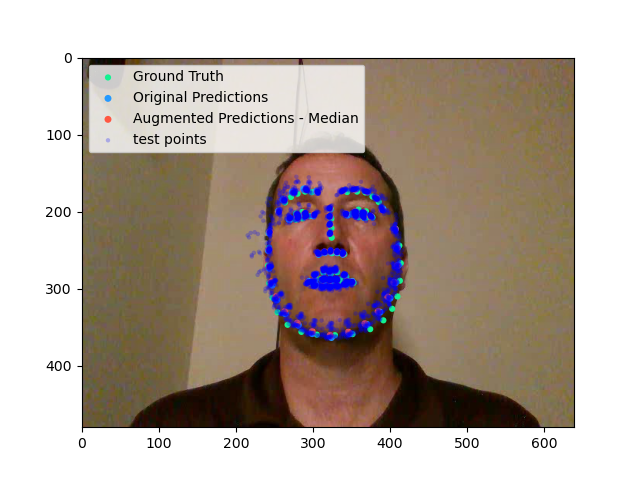

In [12]:
plt.figure()
I = np.flip(img,axis=-1)

implot = plt.imshow(I)
ax = plt.gca()

gt_points = np.transpose(lm_gt)
# Bad lms
plt.scatter(x=gt_points[0], y=gt_points[1], c='#12f290', s=20, alpha=1, edgecolor='none')

og_points = np.transpose(mytest._og_landmarks)
# OG points
plt.scatter(x=og_points[0], y=og_points[1], c='#2599ff', s=25, alpha=1, edgecolor='none')

# Median points
median_points = np.transpose(mytest._median_landmarks)
plt.scatter(x=median_points[0], y=median_points[1], c='#ff5742', s=25, alpha=1, edgecolor='none')

which_points = range(0,68)
# Test points
for i in which_points:
    #plt.scatter(x=points[i,0], y=points[i,1], c=params, cmap='bwr', s=10, alpha=1, edgecolor='none')
    points = mytest._xy_dist
    plt.scatter(x=points[i,0], y=points[i,1], c='blue',s=10, alpha=0.25, edgecolor='none')


# Labels
#ax.legend(loc='upper left',labels=['Augmented Predictions'])
ax.legend(loc='upper left',labels=['Ground Truth','Original Predictions', 'Augmented Predictions - Median', 'test points'])


plt.show()


In [13]:
dataset = DatasetIntegrator("./NeuroFace_Open_Access_Data/")
generator = dataset.patients_generator(disease_type="all", tasks="all")
model_to_use = "MEE"

Patient A002 loading...
Patient A006 loading...
Patient A008 loading...
Patient A009 loading...
Patient A010 loading...
Patient A011 loading...
Patient A012 loading...
Patient A014 loading...
Patient A015 loading...
Patient A016 loading...


[ WARN:0@18.509] global /home/conda/feedstock_root/build_artifacts/libopencv_1647792290612/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('NeuroFace_Open_Access_Data/ALS/Frames/A016_02_NSM_BIGSMILE_color.avi_160.jpg'): can't open/read file: check file path/integrity


Patient A017 loading...
Patient OP01 loading...
Patient OP02 loading...
Patient OP03 loading...
Patient S001 loading...
Patient S002 loading...
Patient S003 loading...
Patient S005 loading...
Patient S006 loading...
Patient S007 loading...
Patient S008 loading...
Patient S009 loading...
Patient S011 loading...
Patient S012 loading...
Patient S013 loading...
Patient N001 loading...
Patient N002 loading...
Patient N003 loading...
Patient N004 loading...
Patient N007 loading...
Patient N008 loading...
Patient N010 loading...
Patient N011 loading...
Patient N012 loading...
Patient N017 loading...
Patient N019 loading...
DatasetIntegrator initialized.
ALS: 11
Stroke: 14
Control: 11


In [14]:
%%time

all_pat = np.array(list(generator))
model_rmse = [[] for i in range(8)] # the rmses of different model for this task (frames' RMSE in each nested list)

# for every patient in the dataset
pat_id = 0

for this_dict in all_pat:
    pat_dict = this_dict[0]
    # for every task in this patient 
    for t in pat_dict.keys():
        task_dict = pat_dict[t]
        #task_rmses = [[],[],[],[]] # the rmses of different model for this task (frames' RMSE in each nested list)

        # for every frame in this task
        for f in task_dict.keys():
            start_time = time.time()
            
            print("********************************************")
            print("Processing patient: " + str(pat_id) + " task: " + str(t) + " frame: " + str(f))
            
            frame_dict = task_dict[f]
            
            im = frame_dict['image']
            lm_gt = to_gemma_landmarks(frame_dict['landmarks_gt'])
            bbox_gt = frame_dict['bbox']

            test_og = LandmarkTester1(im, model_to_use) # 200px original emotrics
            test_og_color = LandmarkTester2(im, model_to_use) # 200px colored
            test_hires_gray = LandmarkTester3(im, model_to_use) # 300px gray 
            test_hires_color = LandmarkTester4(im, model_to_use) # 300px colored 
            
            # test_og.run()
            test_og.test_combined(rand_angle=8, scale=10, num_test=40, rand_mode='normal') # median of 200px
            test_og_color.test_combined(rand_angle=8, scale=10, num_test=40, rand_mode='normal') # median of 200px color
            test_hires_gray.test_combined(rand_angle=8, scale=10, num_test=40, rand_mode='normal') # median of 300px
            test_hires_color.test_combined(rand_angle=8, scale=10, num_test=40, rand_mode='normal') # median of 300px color

            #points = test._xy_dist
            #which_points = np.arange(points.shape[0])

            bbox_len = dist_point(bbox_gt[0:2], bbox_gt[2:])
            model_rmse[0].append(RMSE(lm_gt, test_og._og_landmarks) / bbox_len)
            model_rmse[1].append(RMSE(lm_gt, test_og_color._og_landmarks) / bbox_len)
            model_rmse[2].append(RMSE(lm_gt, test_hires_gray._og_landmarks) / bbox_len)
            model_rmse[3].append(RMSE(lm_gt, test_hires_color._og_landmarks) / bbox_len)
            
            model_rmse[4].append(RMSE(lm_gt, test_og._median_landmarks) / bbox_len)
            model_rmse[5].append(RMSE(lm_gt, test_og_color._median_landmarks) / bbox_len)
            model_rmse[6].append(RMSE(lm_gt, test_hires_gray._median_landmarks) / bbox_len)
            model_rmse[7].append(RMSE(lm_gt, test_hires_color._median_landmarks) / bbox_len)
            
            end_time = time.time()
            print("Frame Total Processing Time: {:.2f}sec".format(end_time - start_time))
            
    
    pat_id+=1
    

********************************************
Processing patient: 0 task: BBP_NORMAL frame: 159
Successfully predicted landmarks!
===== Landmark Tester Initialized =====
Time used : 0.81 sec
((480, 640, 3), dtype('uint8'), 0, 253)
((68, 2), dtype('int16'), 166, 346)
Successfully predicted landmarks!
===== Landmark Tester Initialized =====
Time used : 0.79 sec
((480, 640, 3), dtype('uint8'), 0, 253)
((68, 2), dtype('int16'), 166, 346)
Successfully predicted landmarks!
===== Landmark Tester Initialized =====
Time used : 0.80 sec
((480, 640, 3), dtype('uint8'), 0, 253)
((68, 2), dtype('int16'), 165, 347)
ERROR: Cannot find face or multiple faces detected!
===== Landmark Tester Initialized =====
Time used : 0.78 sec
((480, 640, 3), dtype('uint8'), 0, 253)
((68, 2), dtype('int16'), 0, 0)
Testing 40 rotations & noises...
First param pairs:
===== Tests Started! =====


Process SpawnPoolWorker-24:
Process SpawnPoolWorker-19:
Process SpawnPoolWorker-21:
Traceback (most recent call last):
  File "/opt/anaconda/envs/bp/lib/python3.10/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda/envs/bp/lib/python3.10/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda/envs/bp/lib/python3.10/site-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/opt/anaconda/envs/bp/lib/python3.10/site-packages/multiprocess/queues.py", line 368, in get
    with self._rlock:
  File "/opt/anaconda/envs/bp/lib/python3.10/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
Process SpawnPoolWorker-16:
KeyboardInterrupt
Traceback (most recent call last):
  File "/opt/anaconda/envs/bp/lib/python3.10/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
Traceback (mo

Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...
Successfully predicted landmarks!
One test has completed...


KeyboardInterrupt: 

%%time

task_list = list(dataset._patients[patient_id].keys())
list_of_rmses = []

for t in range(len(task_list)):
    task = task_list[t]

    frame_list = list(dataset._patients[patient_id][task].keys())
    #frame = np.random.choice(list(test._patients[patient_id][task].keys()))
    #frame = 230
    num_frames = len(frame_list)
    rmse_list = np.zeros((4,num_frames), dtype=np.float32)

    for i in range(len(frame_list)):
        frame = frame_list[i]

        im = dataset._patients[patient_id][task][frame]['image']

        lm_gt = dataset._patients[patient_id][task][frame]['landmarks_gt']
        bbox_gt = dataset._patients[patient_id][task][frame]['bbox']

        test_old = LandmarkTester_old(im, model_to_use)
        test = LandmarkTester(im, model_to_use)
        test_old.test_combined(rand_angle=5, scale=15, num_test=30, rand_mode='normal')
        test.test_combined(rand_angle=5, scale=15, num_test=30, rand_mode='normal')

        points = test._xy_dist
        which_points = np.arange(points.shape[0])
        

        bbox_len = dist_point(bbox_gt[0:2], bbox_gt[2:])
        rmse_list[0,i] = RMSE(lm_gt, test_old._og_landmarks) / bbox_len
        rmse_list[1,i] = RMSE(lm_gt, test._og_landmarks) / bbox_len
        rmse_list[2,i] = RMSE(lm_gt, test_old._median_landmarks) / bbox_len
        rmse_list[3,i] = RMSE(lm_gt, test._median_landmarks) / bbox_len
        
    list_of_rmses.append(rmse_list)

In [15]:
#pr2 = ProcessResults(lm_gt, 'lms_only')
#pr.scale_by_bbox(bbox_gt)
#pr2._scaled_by_proportion
#pr2._features

In [16]:
#rmse_list

model1 = np.array([],dtype=np.float32)
model2 = np.array([],dtype=np.float32)
model3 = np.array([],dtype=np.float32)
model4 = np.array([],dtype=np.float32)


for i in list_of_rmses:
    model1 = np.concatenate((model1, i[0]))
    model2 = np.concatenate((model2, i[1]))
    model3 = np.concatenate((model3, i[2]))
    model4 = np.concatenate((model4, i[3]))

    

In [17]:
model_rmse = np.array(model_rmse, dtype=np.float32)

og = model_rmse[0]
og_color = model_rmse[1]
hires_gray = model_rmse[2]
hires_color = model_rmse[3]


median_og = model_rmse[4]
median_og_color = model_rmse[5]
median_hires_gray = model_rmse[6]
median_hires_color = model_rmse[7]

In [18]:
import pandas as pd


In [19]:
models = pd.DataFrame([og,og_color,hires_gray,hires_color,median_og,median_og_color,median_hires_gray,median_hires_color]).T


In [20]:
models[0].mean(), models[0].std()

(nan, nan)

In [21]:
models[1].mean(), models[1].std()

(nan, nan)

In [22]:
models[2].mean(), models[2].std()

(nan, nan)

In [23]:
models[3].mean(), models[3].std()

(nan, nan)

In [24]:
model_rmse.mean(axis=1)

/tmp/ipykernel_1027831/1855801276.py:1: RuntimeWarning: Mean of empty slice.
  model_rmse.mean(axis=1)
/opt/anaconda/envs/bp/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


array([nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [25]:
model_rmse.std(axis=1)

/opt/anaconda/envs/bp/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda/envs/bp/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda/envs/bp/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


array([nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [26]:
len(model_rmse[0])

0

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

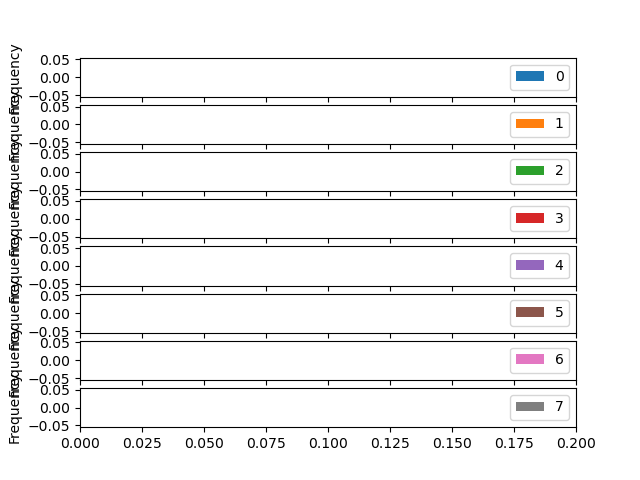

In [27]:
models.plot.hist(subplots=True, bins=15, xlim=(0,0.2))

AttributeError: 'Rectangle' object has no property 'xlim'

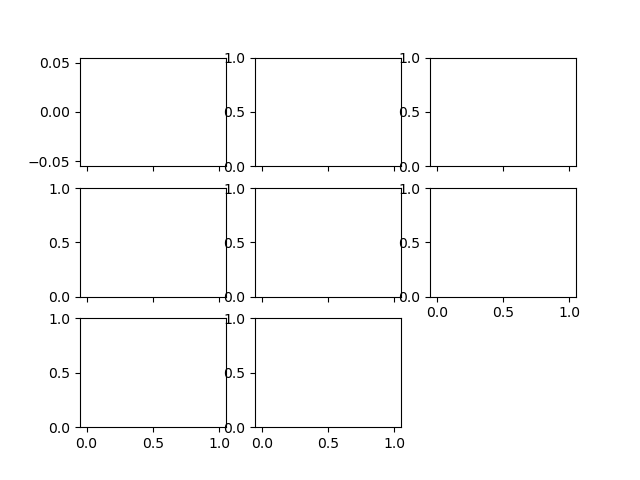

In [28]:
models.hist(bins=15,sharex=True, xlim=(0,0.5))

In [ ]:
from pathlib import Path
model_rmse.to_csv(Path("./models_all_all.csv"))

In [ ]:
df = pd.read_csv('models_all_all.csv')
df = df.drop('Unnamed: 0',axis=1)
df.hist(bins=20)

In [ ]:
df.mean(axis=0)

In [ ]:
df.std(axis=0)

In [ ]:
df.plot.hist(bins=18)

In [ ]:
df.boxplot()

In [1]:
f, ax = plt.subplots(4,2, figsize=(4,3), sharex = False, sharey = False)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        cur_ax = ax[i][j]
        idx = str(i*2+j)
        #fea = 'f'+str(idx)
        print(idx)
        
        
        cur_ax.hist(df[idx], bins=10)       
        #cur_ax.axvline(x=pat_fea[fea], color='r', linewidth=2)
        
        #percentile = percentileofscore(fixed_df[fea], pat_fea[fea])
        #lab = "Patient {}\nPercentile:{:.1f}".format(fea,percentile)
        #cur_ax.legend(fontsize=10, loc='upper right',labels=[lab])

        #cur_ax.set_xlabel(fea)
        cur_ax.set_title(idx)
        cur_ax.grid()
        cur_ax


NameError: name 'plt' is not defined

In [ ]:
df

In [36]:
img = cv2.imread('./NeuroFace_Open_Access_Data/Stroke/Frames/S001_02_NSM_KISS_color.avi_302.jpg')

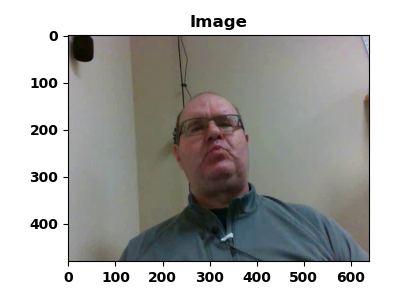

In [37]:
vis_image(np.flip(preprocess_img(img),axis=-1))

In [42]:
I = img.copy()
I = window_image(I,5,95)

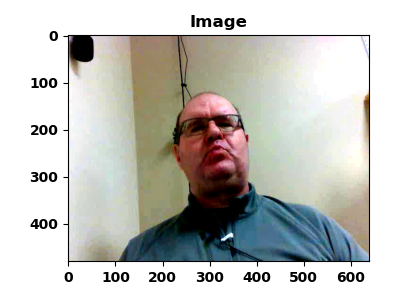

In [43]:
vis_image(np.flip(np.uint8(I),axis=-1))